Qs = fluxo de calor através do ar, saindo do recipiente.
Qr = fluxo de calor do café ao recipiente.
Qp = fluxo de calor saindo das paredes externas para o ar.

  <img src="equações.png" width="400">

In [57]:
#importando as bibliotecas
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

**Agora os dados experimentais:**

  <img src="experimento.jpeg" width="400">

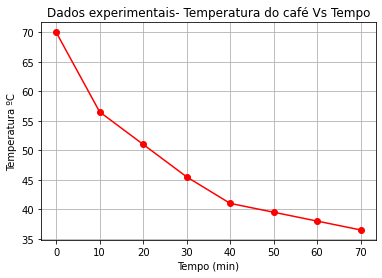

In [58]:
#Dados obtidos
eixo_x = [0,10,20,30,40,50,60,70]
eixo_y = [70,56.5,51,45.5,41,39.5,38,36.5]

#Plotando o gráfico
plt.plot(eixo_x,eixo_y, "r-o")
plt.ylabel("Temperatura ºC")
plt.xlabel("Tempo (min)")
plt.title("Dados experimentais- Temperatura do café Vs Tempo")
plt.grid(True)
plt.savefig('gráfico0.png')
plt.show()

**Início da primeira iteração**- Definindo as constantes para uso posterior:

In [59]:
#TODAS AS MEDIDAS DENTRO DO SISTEMA INTERNACIONAL

#--Dimensões--#
# raio interno (m)
rin = 3.5e-2
# raio externo (m)
rex = 4e-2
#altura do recipiente (m)
hr = 9.5e-2
#altura da coluna de café (m)
hc= 8.0e-2
#espessura copo (m)
e=5e-3

#densidade da água kg/m3
dc=1000
#densidade do recipiente (ceramica) (2000 --> 30000) kg/m³ (Optamos pelo valor intermediário)
drec= 2500
#volume de café (m³)
vc=((math.pi)*rin**2)*hc
#volume do recipiente, raio externo de 4 cm (Recipiente tem 2*pi*3,5*9,5 (raio de 3,5 cm e altura de 9,5 cm) e espessura de 5 mm)
vr=math.pi*hr*(rex**2 - rin**2) + (math.pi*(rex**2)*e)
#massa de café (kg)
mc=dc*vc
#massa do recipiente(kg)
mr=drec*vr
#calor específico da água (J/(kg*K))
cc=4186
#calor específico da ceramica (J/(kg*K))
cr=878
#temperatura ambiente, em K
Ta=25+273.15
# raio médio
rm = (rex + rin)/2
#área da superfície de contato entre o café e o ar (m²)
As=math.pi*rin**2
#área de contato da parede externa do recipiente (m²)
Ap=2*math.pi*rex*hr
#área de contato das paredes internas recipiente (altura total menos a expessura da base) (m²)
Ar=2*math.pi*rin*hc
#condutividade térmica do ceramica (W/m*k)
kr=0.46
#coeficiente de transferência convectiva da superfície d para o ar --> 10 W/m²k
hs=10
#coeficiente de transferência convectiva das paredes do recipiente para o ar --> 10 W/m²k
hp=10

In [60]:
#FUNÇÃO QUE SERÁ USADA NO ODEINT

def derivada(x,t):
    # o primeiro parametro da função é a variavel a ser analisada
    # ela é um vetor pela definição da odeint
    # a primeira posição é Tcafé e na segunga Trecipiente
    Tc = x[0] 
    Tr = x[1] 
    Qs=(Tc-Ta)/(1/(hs*As))
    Qr=(Tc-Tr)/(math.log(rm/rin)/(2*math.pi*kr*hr))
    Qp=(Tr-Ta)/((math.log(rex/rm)/(2*math.pi*kr*hr))+(1/(hp*Ap))) 
    dTcdt=(-Qs-Qr)/(mc*cc)
    dTrdt=(Qr-Qp)/(mr*cr)
    dxdt=[dTcdt, dTrdt]
    return dxdt

# Agora usar odeint :)

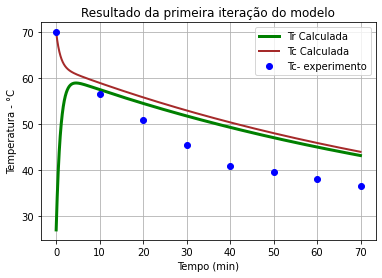

In [61]:
#PRIMEIRA ITERAÇÃO DO MODELO

lisTempo = np.arange(0,4200 , 1)
#condições iniciais: temperatura inicial do café do recipiente = temperatura ambiente
Tc=70+273.15
Tr=25+275.15
ci=[Tc, Tr]
#executando o odeint
x=odeint(derivada, ci, lisTempo)
#conversão de unidades
lisTcCelsius=[temp-273.15 for temp in x[:,0]]
lisTrCelsius=[temp-273.15 for temp in x[:,1]]
lisTempoMin=[t/60 for t in lisTempo]
#plotando o gráfico como pedido
plt.plot(lisTempoMin, lisTrCelsius, color='green', linewidth=3, label='Tr Calculada')
plt.plot(lisTempoMin, lisTcCelsius, color='brown', linewidth=2, label='Tc Calculada')
# ainda não medimos a temperatura do cefé
#plt.plot(TempoExp, TemperaturaExp, 'ro', label='To Medida')
plt.plot(eixo_x,eixo_y, "bo", label= "Tc- experimento")
plt.ylabel("Temperatura - °C")
plt.xlabel("Tempo (min)")
plt.title ("Resultado da primeira iteração do modelo")
plt.legend()
plt.grid(True)
plt.savefig('gráfico1.png')
plt.show()


**VALIDAÇÃO**-- Observada as divergências entre o modelo e os dados experimentais, os parâmetros hs e hp foram alterados (Dentro do limite encontrado de 10 a 1000 W/(𝑚2⋅𝐾)). O Valor que melhor se ajustava foi 22. 

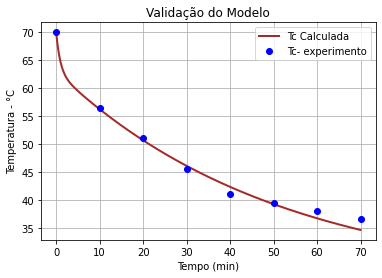

In [62]:
# COMPARAÇÃO DOS VALORES OBTIDOS-- DA TEMPERATURA DA XICARA
def derivada1(x,t):
    hs=22
    hp=22
    Tc = x[0] 
    Tr = x[1] 
    Qs=(Tc-Ta)/(1/(hs*As))
    Qr=(Tc-Tr)/(math.log(rm/rin)/(2*math.pi*kr*hr))
    Qp=(Tr-Ta)/((math.log(rex/rm)/(2*math.pi*kr*hr))+(1/(hp*Ap))) 
    dTcdt=(-Qs-Qr)/(mc*cc)
    dTrdt=(Qr-Qp)/(mr*cr)
    dxdt=[dTcdt, dTrdt]
    return dxdt

x=odeint(derivada1, ci, lisTempo)
#conversão de unidades
lisTcCelsius=[temp-273.15 for temp in x[:,0]]
lisTrCelsius=[temp-273.15 for temp in x[:,1]]
lisTempoMin=[t/60 for t in lisTempo]

plt.plot(lisTempoMin, lisTcCelsius, color='brown', linewidth=2, label='Tc Calculada')
plt.plot(eixo_x,eixo_y, "bo", label= "Tc- experimento")
plt.ylabel("Temperatura - °C")
plt.xlabel("Tempo (min)")
plt.title("Validação do Modelo")
plt.legend()
plt.grid(True)
plt.savefig('gráfico2.png')
plt.show()

**Definição das funções para o gráfico conclusivo:**

In [63]:
def quando45(TcCelsius, lisTempoMin):
    i = 0
    while TcCelsius[i] >= 45:
        i +=1
    return lisTempoMin[i]

def derivada_1(x,t,escala):
    # com os parametros dados vamos variar o tamanho do copo
    hs=22
    hp=22
    vr_e = vr*escala 
    vc_e = vc*escala
    mc=dc*vc_e
    mr=drec*vr_e
    Tc = x[0] 
    Tr = x[1]
    math.pi*hr*(rex**2 - rin**2) + (math.pi*(rex**2)*e)
    Qs=(Tc-Ta)/(1/(hs*As))
    Qr=(Tc-Tr)/(math.log(rm/rin)/(2*math.pi*kr*hr))
    Qp=(Tr-Ta)/((math.log(rex/rm)/(2*math.pi*kr*hr))+(1/(hp*Ap))) 
    dTcdt=(-Qs-Qr)/(mc*cc)
    dTrdt=(Qr-Qp)/(mr*cr)
    dxdt=[dTcdt, dTrdt]
    return dxdt

**GERANDO O GRÁFICO CONCLUSIVO:**
Vamos variar o tamanho da caneca e verificar o quando isso afeta no tempo até o café chegar a uma temperatura ruim de tomar,
próximo de 45ºC (Questão subjetiva do grupo).

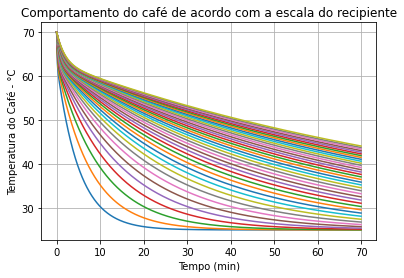

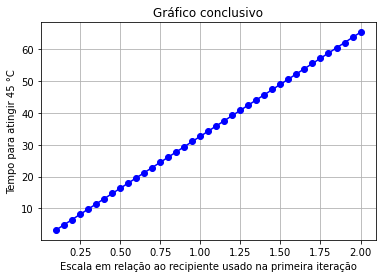

In [64]:
# vamos criar um vetor que represente a escala que vamos multiplicar o copo usado na primeira iteração
escala_lista=np.arange(0.1,2.05, 0.05)
lisTemposAte45=[]

for escala in escala_lista:
    #executando o odeint
    Solucao=odeint(derivada_1, ci, lisTempo, args=(escala,))
    #conversão de unidades
    lisTempCelsius=[temp-273.15 for temp in Solucao[:,0]]
    lisTempoMin=[t/60 for t in lisTempo]
    #plotando o gráfico como pedido
    plt.plot(lisTempoMin, lisTempCelsius)
    #encontra o tempo necessário para atingir 45 graus
    lisTemposAte45.append(quando45(lisTempCelsius, lisTempoMin))

plt.title("Comportamento do café de acordo com a escala do recipiente")    
plt.ylabel("Temperatura do Café - °C")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.savefig('gráfico3.png')
plt.show()
    
#plotando o gráfico conclusivo

plt.title("Gráfico conclusivo")
plt.plot(escala_lista, lisTemposAte45, 'b-o')
plt.xlabel("Escala em relação ao recipiente usado na primeira iteração")
plt.ylabel("Tempo para atingir 45 °C")
plt.grid(True)
plt.savefig('gráfico4.png')
plt.show()